In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import skimage as sk

In [76]:
patientNumber = "12"
regMethodDir = "gradient"
view = "ap"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")
imagesFile = np.load(os.path.join(regDir, f"pacient{patientNumber}Images{view.upper()}.npz"))
pointsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}PointsInfo{view.upper()}.npz"))
saveState = True

In [77]:
images = {key: imagesFile[key] for key in imagesFile.files}
pointsInfo = {key: pointsInfoFile[key] for key in pointsInfoFile.files}

movingImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
movingInitialImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingInitialImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
movingFinalImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingFinalImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
fixedImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["fixedImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)

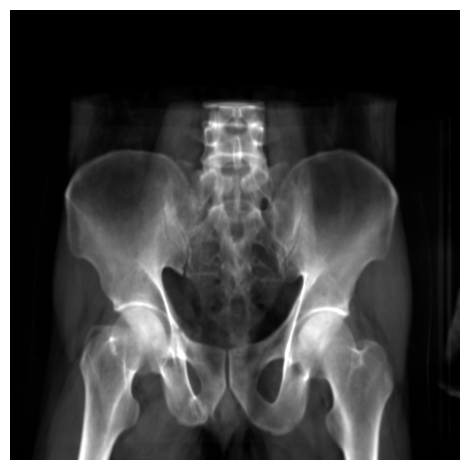

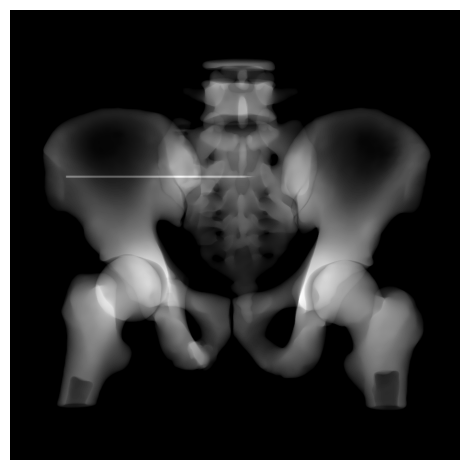

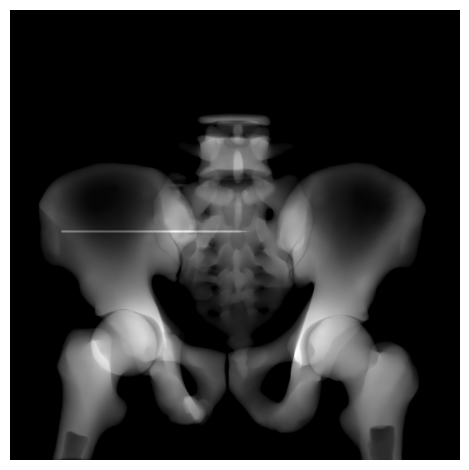

In [78]:
def plotImages(fixed_image, moving_image, moving_initial, save):
    fig_fixed, ax_fixed = plt.subplots(1, 1)
    ax_fixed.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    ax_fixed.set_axis_off()
    fig_fixed.tight_layout()
    
    fig_moving, ax_moving = plt.subplots(1, 1)
    ax_moving.imshow(sitk.GetArrayViewFromImage(moving_image), cmap="gray")
    ax_moving.set_axis_off()
    fig_moving.tight_layout()
    
    fig_initial, ax_initial = plt.subplots(1, 1)
    ax_initial.imshow(sitk.GetArrayViewFromImage(moving_initial), cmap="gray")
    ax_initial.set_axis_off()
    fig_initial.tight_layout()
    plt.show()
        
    if save:
        fig_fixed.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}{regMethodDir}Fixed.pdf", 
                          bbox_inches="tight")
        fig_moving.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}{regMethodDir}Moving"
                           f".pdf", bbox_inches="tight")
        fig_initial.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}{regMethodDir}Initial"
                            f".pdf", bbox_inches="tight")

plotImages(fixedImageRescaled, movingImageRescaled,
           movingInitialImageRescaled, save=saveState)

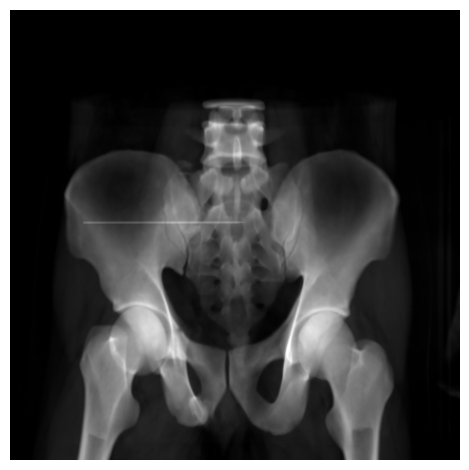

In [79]:
def plotAlphaBlend(image1: sitk.Image, image2, alpha=0.5, save=False):
    fig_alpha, ax_alpha = plt.subplots(1, 1)
    img1 = sitk.Cast(image1, sitk.sitkFloat32)
    img2 = sitk.Cast(image2, sitk.sitkFloat32)
    imageOutput = (alpha * img1) + (1 - alpha) * img2

    ax_alpha.imshow(sitk.GetArrayViewFromImage(imageOutput), cmap="gray")
    ax_alpha.set_axis_off()
    fig_alpha.tight_layout()
    plt.show()
    
    if save:
        fig_alpha.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}{regMethodDir}Alpha.pdf", 
                          bbox_inches="tight")

plotAlphaBlend(movingFinalImageRescaled, fixedImageRescaled, alpha=0.5, save=saveState)

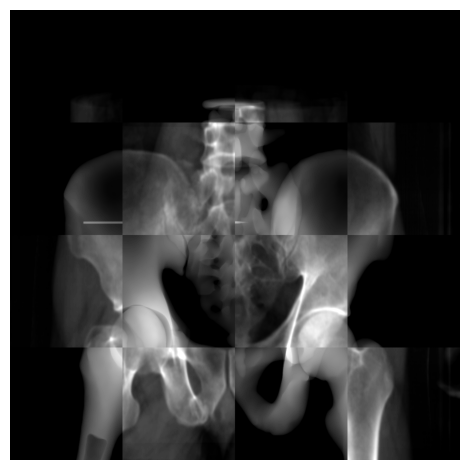

In [80]:
def plotCheckerboard(image1, image2, pattern=(4, 4), save=False):
    imagesCheckerboard = sitk.CheckerBoard(image1, image2, pattern)
    
    fig_check, ax_check = plt.subplots(1, 1)
    ax_check.imshow(sitk.GetArrayViewFromImage(imagesCheckerboard), cmap="gray")
    ax_check.set_axis_off()
    fig_check.tight_layout()
    plt.show()
    
    if save:
        fig_check.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\pacient{patientNumber}{regMethodDir}Checker"
                          f".pdf", bbox_inches="tight")

plotCheckerboard(fixedImageRescaled, movingFinalImageRescaled, pattern=(4, 4), save=saveState)

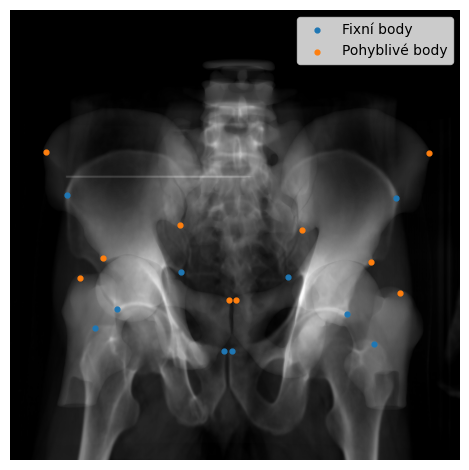

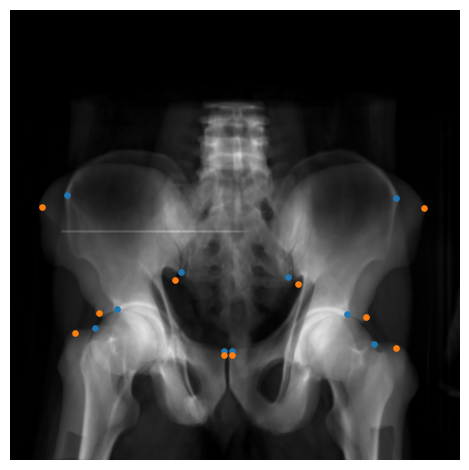

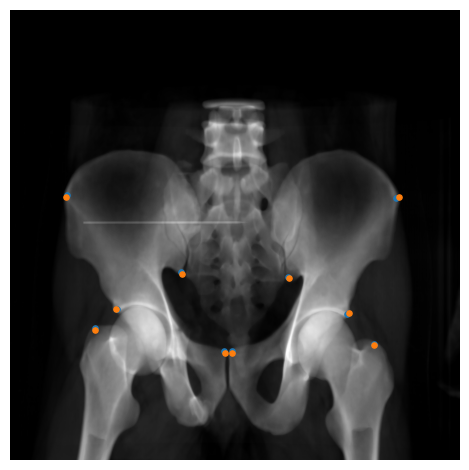

In [81]:
def plotImagesAndPoints(fixed_image, moving_pre, moving_initial, moving_final, 
                        points, save=False):
    fig_pre, ax_pre = plt.subplots(1, 1)
    ax_pre.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    ax_pre.imshow(sitk.GetArrayViewFromImage(moving_pre), cmap="gray", alpha=0.5)
    ax_pre.scatter(list(points["fixedPoints"].T)[0], list(points["fixedPoints"].T)[1], 
                c="#1f77b4", s=12, label="Fixní body")
    ax_pre.scatter(list(points["movingPoints"].T)[0], list(points["movingPoints"].T)[1], 
                c="#ff7f0e", s=12, label="Pohyblivé body")
    ax_pre.set_axis_off()
    ax_pre.legend()
    fig_pre.tight_layout()
    ax_pre.legend()
    
    fig_initial, ax_initial = plt.subplots(1, 1)
    ax_initial.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    ax_initial.imshow(sitk.GetArrayViewFromImage(moving_initial), cmap="gray", alpha=0.5)
    ax_initial.scatter(list(points["fixedPoints"].T)[0], list(points["fixedPoints"].T)[1], 
                c="#1f77b4", s=14, label="Fixní body")
    ax_initial.scatter(list(points["movingInitialPoints"].T)[0], list(points["movingInitialPoints"].T)[1], 
                c="#ff7f0e", s=14, label="Pohyblivé body")
    ax_initial.set_axis_off()
    fig_initial.tight_layout()
    
    fig_final, ax_final = plt.subplots(1, 1)
    ax_final.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap="gray")
    ax_final.imshow(sitk.GetArrayViewFromImage(moving_final), cmap="gray", alpha=0.5)
    ax_final.scatter(list(points["fixedPoints"].T)[0], list(points["fixedPoints"].T)[1], 
                c="#1f77b4", s=14, label="Fixní body")
    ax_final.scatter(list(points["movingFinalPoints"].T)[0], list(points["movingFinalPoints"].T)[1], 
                c="#ff7f0e", s=14, label="Pohyblivé body")
    ax_final.set_axis_off()
    fig_final.tight_layout()
    plt.show()
        
    if save:
        fig_pre.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\"
                        f"pacient{patientNumber}{regMethodDir}FixedPoints.pdf", 
                        bbox_inches="tight")
        fig_initial.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\"
                            f"pacient{patientNumber}{regMethodDir}InitialPoints.pdf", 
                            bbox_inches="tight")
        fig_final.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\"
                          f"pacient{patientNumber}{regMethodDir}FinalPoints.pdf", 
                          bbox_inches="tight")

plotImagesAndPoints(fixedImageRescaled, movingImageRescaled, movingInitialImageRescaled,
                    movingFinalImageRescaled, points=pointsInfo, save=saveState)

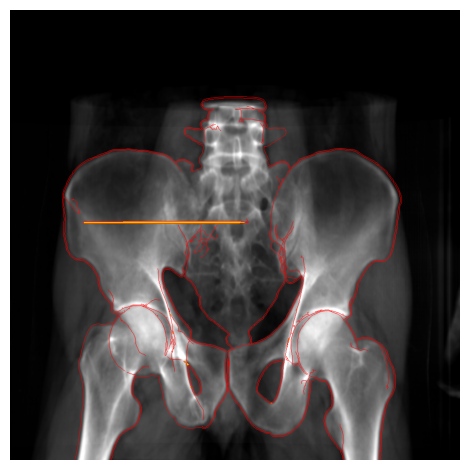

In [139]:
def plotImageAndEdge(moving_image, fixed_image,
                     low_thresh_bones: float = 0.0, high_thresh_bones: float = 0.0,
                     low_thresh_guide: float = 0.0, high_thresh_guide: float = 0.0,
                     save=False):
    
    input_image = sitk.GetImageFromArray(moving_image)
    bone_edges = sitk.CannyEdgeDetection(input_image,
                                         lowerThreshold=low_thresh_bones, 
                                         upperThreshold=high_thresh_bones)
    guide_edges = sitk.CannyEdgeDetection(input_image, 
                                          lowerThreshold=low_thresh_guide, 
                                          upperThreshold=high_thresh_guide)
    
    guide_closed = sk.morphology.closing(sitk.GetArrayFromImage(guide_edges), footprint=np.ones(shape=(5, 5)))
    sitk_guide_closed = sitk.Cast(255 * sitk.GetImageFromArray(guide_closed), sitk.sitkUInt8)
    edge_label = sitk.Cast(255 * bone_edges, sitk.sitkUInt8)
    
    edge_label[edge_label == 255] = 1
    sitk_guide_closed[sitk_guide_closed == 255] = 2
    # all_labels = [edge_label, sitk_guide_closed]
    
    # combined_labels = sitk.Image(all_labels[0].GetSize(), all_labels[0].GetPixelID())
    combined_labels = edge_label + sitk_guide_closed
    
    # for idx, label in enumerate(all_labels, start=1):
    #     combined_labels += label * idx
    
    guide_color = [255, 188, 0] # guidewire label color
    bone_color = [255, 0, 0] # bone edges label color
    
    images_combined = sitk.LabelOverlay(image=fixed_image,
                                        labelImage=combined_labels,
                                        opacity=1.0, backgroundValue=0.0, 
                                        colormap=guide_color + bone_color) # červené hrany

    fig_edge, ax_edge = plt.subplots(1, 1)
    ax_edge.imshow(sitk.GetArrayViewFromImage(images_combined))
    ax_edge.set_axis_off()
    fig_edge.tight_layout()
    plt.show()
    
    if save:
        fig_edge.savefig(f"graficke_vystupy\\pacient_{patientNumber}\\"
                         f"pacient{patientNumber}{regMethodDir}Edges.pdf", 
                         bbox_inches="tight")

plotImageAndEdge(images["movingFinalImage"], fixedImageRescaled,
                 low_thresh_bones=0.0, high_thresh_bones=0.4, 
                 low_thresh_guide=0.1, high_thresh_guide=0.5, save=saveState)
